<a href="https://colab.research.google.com/github/Rodrigoveloso7/CONDUCAO1D/blob/main/RESOLU%C3%87%C3%83O_VOLUMES_FINITOS_CONDU%C3%87%C3%83O_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

CONSTANTES

In [ ]:
TA = 20+273.15 #Kelvin
TB = 30+273.15 #Kelvin
L = 0.1 # metros
k=400 # W/mK
q = 10**5 #Wm
A=0.01 #m²
N =5

DEFINIÇÃO DOS COMPRIMENTOS DE CADA VOLUME DE CONTROLE

In [ ]:
dx = N*[0.020]

DEFINIÇÃO DAS COORDENADAS LESTE DE CADA VOLUME DE CONTROLE

In [ ]:
xe = np.zeros(len(dx)+1)

In [ ]:
for i in range(1,len(xe)-1):
  xe[i] = xe[i-1]+dx[i-1]
xe[0] = 0
xe[-1] = L

In [ ]:
xe

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

DEFINIÇÃO DA COORDENADA CENTRAL DE CADA VOLUME DE CONTROLE

In [ ]:
xp = np.zeros_like(dx)

In [ ]:
for i in range(0,len(dx)):
  xp[i] = (xe[i+1]+xe[i])/2

In [ ]:
xp

array([0.01, 0.03, 0.05, 0.07, 0.09])

In [ ]:
dxe = np.zeros_like(xe)

In [ ]:
dxe

array([0., 0., 0., 0., 0., 0.])

In [ ]:
for i in range(0,len(xp)-1):
  dxe[i+1] = xp[i+1]-xp[i]
dxe[0] = dxe[1]
dxe[-1] = dx[-1]
dxe

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

DISCRETIZAÇÃO DA EQUAÇÃO DIFERENCIAL

In [ ]:
A = np.zeros((len(dx)+2,len(dx)+2))
B = np.zeros((len(dx)+2,1))

DEFININDO CONDIÇÃO DE CONTORNO EM X=0

In [ ]:
A[0,0] = 1
A[0,1] = -1
B[0,-1] = 2*TA

DEFININDO CONDIÇÃO DE CONTORNO EM X=L

In [ ]:
A[-1,-1] = 1
A[-1,-2] = -1
B[-1,-1] = 2*TB

In [ ]:
B

array([[586.3],
       [  0. ],
       [  0. ],
       [  0. ],
       [  0. ],
       [  0. ],
       [606.3]])

In [ ]:
dxe

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

CALCULANDO TERMOS ae aw ap DE P=1 ATE P=N

In [ ]:
for i in range(1,len(dx)+1):
  A[i,i-1] = k/dxe[i-1]        #aw
  A[i,i+1] = k/dxe[i]          #ae
  A[i,i] = A[i,i-1]+A[i,i+1]   #ap = ae + aw
  B[i,0] = (q/xp[i-1])*dx[i-1] #bp
A

array([[ 1.e+00, -1.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00],
       [ 2.e+04,  4.e+04,  2.e+04,  0.e+00,  0.e+00,  0.e+00,  0.e+00],
       [ 0.e+00,  2.e+04,  4.e+04,  2.e+04,  0.e+00,  0.e+00,  0.e+00],
       [ 0.e+00,  0.e+00,  2.e+04,  4.e+04,  2.e+04,  0.e+00,  0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00,  2.e+04,  4.e+04,  2.e+04,  0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00,  2.e+04,  4.e+04,  2.e+04],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00, -1.e+00,  1.e+00]])

In [ ]:
B

array([[   586.3       ],
       [200000.        ],
       [ 66666.66666667],
       [ 40000.        ],
       [ 28571.42857143],
       [ 22222.22222222],
       [   606.3       ]])

In [ ]:
def tdma_solver(matriz_coef,b):
  N = len(matriz_coef)-2
  Pp = [0]*(N+2)
  Qp = [0]*(N+2)
  #Definindo P0 e Q0
  P0 = matriz_coef[0][1]/matriz_coef[0][0]
  Q0 = b[0]/matriz_coef[0][0]

  Pp[0] = P0
  Qp[0] = Q0

  # print(len(Pp))
  #Definindo Pp e Qp
  for p in range(1,N+1):
    Pp[p] =(matriz_coef[p][p+1])/(matriz_coef[p][p]-(matriz_coef[p][p-1]*Pp[p-1]))
  Pp[N+1] = 0
  for p in range(1,N+2):
    Qp[p] =(b[p]+matriz_coef[p][p-1]*Qp[p-1])/(matriz_coef[p][p]-(matriz_coef[p][p-1]*Pp[p-1]))

  Tn = [0]*(N+2)
  Tn[N+1] = Qp[N+1]
  print(Tn)
  for i in range(N,-1,-1):
    Tn[i] = Pp[i]*Tn[i+1]+Qp[i]


  return Tn

In [ ]:
xp = np.append(xp,L)
xp = np.insert(xp,0,0)

In [ ]:
xp

array([0.  , 0.01, 0.03, 0.05, 0.07, 0.09, 0.1 ])

In [ ]:
T_VF= tdma_solver(A,B)

[0, 0, 0, 0, 0, 0, array([301.65])]


In [ ]:
T_VF[0] = np.array([TA])
T_VF[-1] = np.array([TB])

In [ ]:
T_VF

[array([293.15]),
 array([300.58650794]),
 array([305.45952381]),
 array([306.99920635]),
 array([306.53888889]),
 array([304.65]),
 array([303.15])]

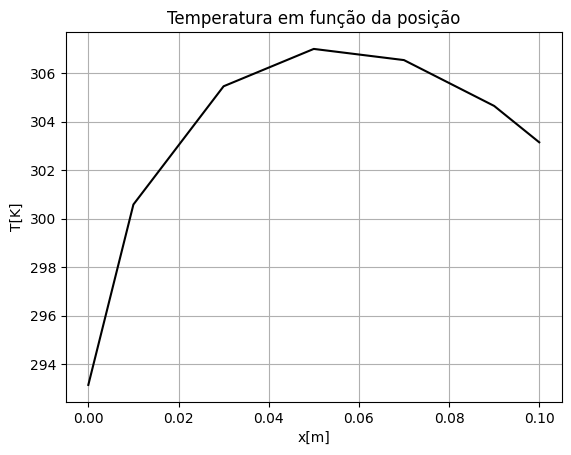

In [ ]:
plt.plot(xp,T_VF[:],color='BLACK')
plt.title('Temperatura em função da posição')
plt.xlabel('x[m]')
plt.ylabel('T[K]')
plt.grid()

In [ ]:
T_VF

[array([293.15]),
 array([300.58650794]),
 array([305.45952381]),
 array([306.99920635]),
 array([306.53888889]),
 array([304.65]),
 array([303.15])]

In [ ]:
[300.58650794,305.45952381,306.99920635,306.53888889,304.65]

[300.58650794, 305.45952381, 306.99920635, 306.53888889, 304.65]